In [1]:
#Prepare Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error,r2_score,mean_absolute_error, classification_report
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.multioutput import MultiOutputClassifier



### Prepare & View Dataset

For current project, two datasets from different subscription services (Netflix and Disney+) will be chosen, also providing IMDB dataset which also provides ratings for movies

In [2]:
disney_data = pd.read_csv("disney_plus_titles.csv")
netflix_data = pd.read_csv("netflix_titles.csv")
amazon_data = pd.read_csv("amazon_prime_titles.csv")
imdb_data = pd.read_csv("imdb_movies.csv")

In [3]:
disney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [4]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [6]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [7]:
disney_data.set_index("show_id").sample(5)

type                         title           director  \
show_id                                                             
s641       Movie                       Destino  Monfery Dominique   
s129       Movie                        Eragon   Stefen Fangmeier   
s705     TV Show  Mickey Mouse Roadster Racers                NaN   
s250       Movie              Treasure Buddies       Robert Vince   
s243     TV Show                Liv and Maddie                NaN   

                                                      cast  \
show_id                                                      
s641                                              Dora Luz   
s129     Ed Speleers, Jeremy Irons, Sienna Guillory, Ro...   
s705     Bret Iwan, Russi Taylor, Bill Farmer, Daniel R...   
s250     Richard Riehle, Mason Cook, Adam Alexi-Malle, ...   
s243     Dove Cameron, Joey Bragg, Tenzing Norgay Train...   

                                        country         date_added  \
show_id                                                              
s641                      France, United States   January 10, 2020   
s129     United States, United Kingdom, Hungary    August 20, 2021   
s705                                        NaN  November 20, 2019   
s250                      United States, Canada     April 16, 2021   
s243                              United States     April 23, 2021   

         release_year rating   duration                          listed_in  \
show_id                                                                      
s641             2003     PG      6 min         Animation, Family, Romance   
s129             2006     PG    104 min  Action-Adventure, Family, Fantasy   
s705             2017   TV-Y  2 Seasons            Animation, Kids, Sports   
s250             2012      G     96 min     Action-Adventure, Comedy, Kids   
s243             2013   TV-G  4 Seasons        Comedy, Coming of Age, Kids   

                                               description  
show_id                                                     
s641     A collaboration begun in 1945 by Salvador Dalí...  
s129     In a mythical time, a teenage boy becomes a dr...  
s705     The Sensational Six race roadsters around the ...  
s250     Travel across the globe on a treasure hunt wit...  
s243     The series follows 15-year-old twins Liv and M...

In [8]:
netflix_data.set_index("show_id").sample(5)

type                   title  \
show_id                                    
s5014      Movie          Something Huge   
s6483      Movie  Chronicle of an Escape   
s7246    TV Show       Kurt Seyit & Sura   
s3929    TV Show                 Persona   
s8057      Movie            Son of a Gun   

                                                  director  \
show_id                                                      
s5014                                         Carlo Padial   
s6483                                Israel Adrián Caetano   
s7246                                                  NaN   
s3929    Lee Kyoungmi, Yim Pilsung, Jeon Go-woon, Kim J...   
s8057                                         Julius Avery   

                                                      cast  \
show_id                                                      
s5014    Berto Romero, Carolina Bang, Javier Botet, Car...   
s6483    Rodrigo de la Serna, Pablo Echarri, Nazareno C...   
s7246    Kıvanç Tatlıtuğ, Farah Zeynep Abdullah, Fahriy...   
s3929    Lee Ji-eun (IU), Bae Doona, Park Hae Soo, Kim ...   
s8057    Ewan McGregor, Brenton Thwaites, Alicia Vikand...   

                                   country         date_added  release_year  \
show_id                                                                       
s5014                                Spain      March 1, 2018          2017   
s6483                            Argentina      June 15, 2018          2006   
s7246                               Turkey  December 26, 2016          2014   
s3929                          South Korea     April 11, 2019          2019   
s8057    Australia, United Kingdom, Canada      July 19, 2018          2014   

        rating  duration                                          listed_in  \
show_id                                                                       
s5014    TV-MA    87 min  Comedies, Independent Movies, International Mo...   
s6483        R   104 min            Dramas, International Movies, Thrillers   
s7246    TV-14  1 Season  International TV Shows, Romantic TV Shows, TV ...   
s3929    TV-MA  1 Season  International TV Shows, Korean TV Shows, TV Dr...   
s8057        R   109 min     Action & Adventure, Dramas, Independent Movies   

                                               description  
show_id                                                     
s5014    A director and a comedian want to shoot the "c...  
s6483    Soccer goalie Claudio Tamburrini is kidnapped ...  
s7246    A Turkish lieutenant and the daughter of Russi...  
s3929    An exploration of different personas in an ecl...  
s8057    A young petty thief who received protection fr...

In [9]:
amazon_data.set_index("show_id").sample(5)

type                    title                director  \
show_id                                                           
s4716    Movie                  Seduced           Jessica Janos   
s578     Movie  The Last Days Of Patton            Delbert Mann   
s8634    Movie             The BIG Rant  Shubham Sanjay Shevade   
s8987    Movie     Two Worlds Colliding           Tasha Hubbard   
s6658    Movie                     Bala                  Deepak   

                                                      cast country date_added  \
show_id                                                                         
s4716    Elisabeth Röhm, Jon Prescott, Julie Mond, Robe...     NaN        NaN   
s578     George C. Scott, Eva Marie Saint, Peter Banks,...     NaN        NaN   
s8634                       Poorva Wachh, Keith Szarabajka     NaN        NaN   
s8987                                                  NaN     NaN        NaN   
s6658    Shaam, Meera Jasmine, Rajan P. Dev, Raghuvaran...     NaN        NaN   

         release_year   rating duration                      listed_in  \
show_id                                                                  
s4716            2016  UNRATED   87 min                       Suspense   
s578             1986      NaN  148 min        Drama, Military and War   
s8634            2021      13+   84 min                  Comedy, Drama   
s8987            2004      13+   49 min  Documentary, Special Interest   
s6658            2002      18+  136 min                        Romance   

                                               description  
show_id                                                     
s4716    Caroline’s daughter tries to jump-start her wi...  
s578     Following the close of World War II, General G...  
s8634    When Harry, an Indian voice-over actor struggl...  
s8987    When Night comes forward with his story of bei...  
s6658    Bala,a hitman in Pasupathi's gang, is madly in...

In [10]:
imdb_data.sample(4)

names       date_x  score  \
4867                             Hero  03/17/2004    75.0   
478                   The Parent Trap  07/29/1998    71.0   
9971  Billy Lynn's Long Halftime Walk  01/24/2017    60.0   
3692                        Come Play  08/18/2021    64.0   

                                  genre  \
4867  Drama, Adventure, Action, History   
478                      Comedy, Family   
9971                         Drama, War   
3692          Horror, Mystery, Thriller   

                                               overview  \
4867  One man defeated three assassins who sought to...   
478   Hallie Parker and Annie James are identical tw...   
9971  19-year-old Billy Lynn is brought home for a v...   
3692  A lonely young boy feels different from everyo...   

                                                   crew  \
4867  Jet Li, Nameless, Tony Leung Chiu-wai, Broken ...   
478   Lindsay Lohan, Hallie Parker / Annie James, De...   
9971  Joe Alwyn, Billy Lynn, Kristen Stewart, Kathry...   
3692  Gillian Jacobs, Sarah, John Gallagher Jr., Mar...   

                           orig_title     status orig_lang    budget_x  \
4867                               英雄   Released   Chinese  42000000.0   
478                   The Parent Trap   Released   English  15000000.0   
9971  Billy Lynn's Long Halftime Walk   Released   English  40000000.0   
3692                        Come Play   Released   English   9000000.0   

         revenue country  
4867  66787173.0      AU  
478   92108518.0      US  
9971  30930984.0      AU  
3692  12624174.0      AU

### Data Cleaning / Data Picking

Due to imdb dataset only counts for movies, so filter subscription dataset for movies only and pick columns relevant to movie ratings

In [11]:
netflix_movies = netflix_data[(netflix_data["type"]=="Movie")]
filter_column = ["show_id","title","release_year","duration","director","country"]
netflix_movies = netflix_movies.loc[:,filter_column]
netflix_movies.rename(columns={"description":"netflix_description","show_id":"netflix_id"},inplace=True)
netflix_movies.set_index("netflix_id")


title  release_year duration  \
netflix_id                                                            
s1                      Dick Johnson Is Dead          2020   90 min   
s7          My Little Pony: A New Generation          2021   91 min   
s8                                   Sankofa          1993  125 min   
s10                             The Starling          2021  104 min   
s13                             Je Suis Karl          2021  127 min   
...                                      ...           ...      ...   
s8802                                Zinzana          2015   96 min   
s8803                                 Zodiac          2007  158 min   
s8805                             Zombieland          2009   88 min   
s8806                                   Zoom          2006   88 min   
s8807                                 Zubaan          2015  111 min   

                                 director  \
netflix_id                                  
s1                        Kirsten Johnson   
s7          Robert Cullen, José Luis Ucha   
s8                           Haile Gerima   
s10                        Theodore Melfi   
s13                   Christian Schwochow   
...                                   ...   
s8802                     Majid Al Ansari   
s8803                       David Fincher   
s8805                     Ruben Fleischer   
s8806                        Peter Hewitt   
s8807                         Mozez Singh   

                                                      country  
netflix_id                                                     
s1                                              United States  
s7                                                        NaN  
s8          United States, Ghana, Burkina Faso, United Kin...  
s10                                             United States  
s13                                   Germany, Czech Republic  
...                                                       ...  
s8802                            United Arab Emirates, Jordan  
s8803                                           United States  
s8805                                           United States  
s8806                                           United States  
s8807                                                   India  

[6131 rows x 5 columns]

In [12]:
disney_movies = disney_data[(disney_data["type"]=="Movie")]
disney_movies = disney_movies.loc[:,filter_column]
disney_movies.rename(columns={"description":"disney_description","show_id":"disney_id"},inplace=True)

disney_movies.set_index("disney_id")

title  release_year  \
disney_id                                                                   
s1         Duck the Halls: A Mickey Mouse Christmas Special          2016   
s2                                   Ernest Saves Christmas          1988   
s3                             Ice Age: A Mammoth Christmas          2011   
s4                               The Queen Family Singalong          2021   
s6                                        Becoming Cousteau          2021   
...                                                     ...           ...   
s1446                              X-Men Origins: Wolverine          2009   
s1447        Night at the Museum: Battle of the Smithsonian          2009   
s1448                                       Eddie the Eagle          2016   
s1449                                  Bend It Like Beckham          2003   
s1450                 Captain Sparky vs. The Flying Saucers          2012   

          duration                           director  \
disney_id                                               
s1          23 min  Alonso Ramirez Ramos, Dave Wasson   
s2          91 min                        John Cherry   
s3          23 min                       Karen Disher   
s4          41 min                    Hamish Hamilton   
s6          94 min                         Liz Garbus   
...            ...                                ...   
s1446      108 min                         Gavin Hood   
s1447      106 min                         Shawn Levy   
s1448      107 min                    Dexter Fletcher   
s1449      112 min                    Gurinder Chadha   
s1450        2 min                        Mark Waring   

                                          country  
disney_id                                          
s1                                            NaN  
s2                                            NaN  
s3                                  United States  
s4                                            NaN  
s6                                  United States  
...                                           ...  
s1446               United States, United Kingdom  
s1447                       United States, Canada  
s1448      United Kingdom, Germany, United States  
s1449      United Kingdom, Germany, United States  
s1450                               United States  

[1052 rows x 5 columns]

In [13]:
amazon_movies = amazon_data[(amazon_data["type"]=="Movie")]
amazon_movies = amazon_movies.loc[:,filter_column]
amazon_movies.rename(columns={"description":"amazon_description","show_id":"amazon_id"},inplace=True)

amazon_movies.set_index("amazon_id")

title  release_year duration  \
amazon_id                                                
s1          The Grand Seduction          2014  113 min   
s2         Take Care Good Night          2018  110 min   
s3         Secrets of Deception          2017   74 min   
s4           Pink: Staying True          2014   69 min   
s5                Monster Maker          1989   45 min   
...                         ...           ...      ...   
s9661        The Man in the Hat          2021   96 min   
s9663                     River          2021   93 min   
s9664       Pride Of The Bowery          1940   60 min   
s9666                   Outpost          2008   90 min   
s9668               Harry Brown          2010  103 min   

                                      director         country  
amazon_id                                                       
s1                                Don McKellar          Canada  
s2                                Girish Joshi           India  
s3                                 Josh Webber   United States  
s4                              Sonia Anderson   United States  
s5                                Giles Foster  United Kingdom  
...                                        ...             ...  
s9661      John-Paul Davidson, Stephen Warbeck             NaN  
s9663                               Emily Skye             NaN  
s9664                          Joseph H. Lewis             NaN  
s9666                             Steve Barker             NaN  
s9668                            Daniel Barber             NaN  

[7814 rows x 5 columns]

In [14]:
#Apply the same to IMDB Movies
filter_imdb =[0,1,2,3,4,6,8]
imdb_ratings = imdb_data.iloc[:,filter_imdb]
imdb_ratings["date_x"] = pd.to_datetime(imdb_ratings["date_x"])
imdb_ratings["year"]= imdb_ratings["date_x"].dt.year
imdb_ratings.rename(columns={"names":"en_title","orig_title":"title","year":"release_year"},inplace=True)

imdb_ratings_true = imdb_ratings.drop(columns="date_x")

imdb_ratings_true

C:\Users\viola\AppData\Local\Temp\ipykernel_8056\2211533331.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_ratings["date_x"] = pd.to_datetime(imdb_ratings["date_x"])
C:\Users\viola\AppData\Local\Temp\ipykernel_8056\2211533331.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_ratings["year"]= imdb_ratings["date_x"].dt.year
C:\Users\viola\AppData\Local\Temp\ipykernel_8056\2211533331.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cavea

en_title  score  \
0                                    Creed III   73.0   
1                     Avatar: The Way of Water   78.0   
2                  The Super Mario Bros. Movie   76.0   
3                                      Mummies   70.0   
4                                    Supercell   61.0   
...                                        ...    ...   
10173                       20th Century Women   73.0   
10174  Delta Force 2: The Colombian Connection   54.0   
10175                         The Russia House   61.0   
10176         Darkman II: The Return of Durant   55.0   
10177       The Swan Princess: A Royal Wedding   70.0   

                                                   genre  \
0                                          Drama, Action   
1                     Science Fiction, Adventure, Action   
2          Animation, Adventure, Family, Fantasy, Comedy   
3          Animation, Comedy, Family, Adventure, Fantasy   
4                                                 Action   
...                                                  ...   
10173                                              Drama   
10174                                             Action   
10175                           Drama, Thriller, Romance   
10176  Action, Adventure, Science Fiction, Thriller, ...   
10177                         Animation, Family, Fantasy   

                                                overview  \
0      After dominating the boxing world, Adonis Cree...   
1      Set more than a decade after the events of the...   
2      While working underground to fix a water main,...   
3      Through a series of unfortunate events, three ...   
4      Good-hearted teenager William always lived in ...   
...                                                  ...   
10173  In 1979 Santa Barbara, California, Dorothea Fi...   
10174  When DEA agents are taken captive by a ruthles...   
10175  Barley Scott Blair, a Lisbon-based editor of R...   
10176  Darkman and Durant return and they hate each o...   
10177  Princess Odette and Prince Derek are going to ...   

                                         title            orig_lang  \
0                                    Creed III              English   
1                     Avatar: The Way of Water              English   
2                  The Super Mario Bros. Movie              English   
3                                       Momias   Spanish, Castilian   
4                                    Supercell              English   
...                                        ...                  ...   
10173                       20th Century Women              English   
10174  Delta Force 2: The Colombian Connection              English   
10175                         The Russia House              English   
10176         Darkman II: The Return of Durant              English   
10177       The Swan Princess: A Royal Wedding              English   

       release_year  
0              2023  
1              2022  
2              2023  
3              2023  
4              2023  
...             ...  
10173          2016  
10174          1990  
10175          1990  
10176          1995  
10177          2020  

[10178 rows x 7 columns]

In [15]:
netflix_movies.isna().sum()

netflix_id        0
title             0
release_year      0
duration          3
director        188
country         440
dtype: int64

In [16]:
disney_movies.isna().sum()

disney_id         0
title             0
release_year      0
duration          0
director         75
country         106
dtype: int64

In [17]:
amazon_movies.isna().sum()

amazon_id          0
title              0
release_year       0
duration           0
director         229
country         7245
dtype: int64

In [18]:
imdb_ratings_true.isna().sum()


en_title         0
score            0
genre           85
overview         0
title            0
orig_lang        0
release_year     0
dtype: int64

To handle the missing values, since most columns of missing values does not affect the movie ratings. So simply replacing with "Unknown" (for string). For missing integer value, filling with mean value is chosen (except the missing value is very few that it will be dropped)

In [19]:
subs_missing_data_column = ["director","country"]

for i in subs_missing_data_column:
    netflix_movies[i] = netflix_movies[i].fillna("Unknown")
    disney_movies[i] = disney_movies[i].fillna("Unknown")
    amazon_movies[i] =amazon_movies[i].fillna("Unknown")
    
netflix_movies = netflix_movies.dropna(subset="duration")    

In [20]:
imdb_ratings_true["genre"] = imdb_ratings_true["genre"].fillna("Unknown Genre")


In [21]:
imdb_ratings_true.drop_duplicates(subset="title",inplace=True)

imdb_ratings_true.duplicated(keep=False).sum()
# imdb_ratings_true[imdb_ratings_true.duplicated(keep=False)]

np.int64(0)

### Merge Datasets

In [22]:
subscription_movies = pd.merge(netflix_movies,amazon_movies,how="outer",on=["title","release_year","duration"])
subscription_movies = pd.merge(subscription_movies,disney_movies,how="outer",on=["title","release_year","duration"])

subscription_movies

netflix_id                          title  release_year duration  \
0            NaN                     "Mixed Up"          2020  106 min   
1          s2037                         #Alive          2020   99 min   
2          s2305  #AnneFrank - Parallel Stories          2019   95 min   
3          s2482              #FriendButMarried          2018  102 min   
4          s2325            #FriendButMarried 2          2020  104 min   
...          ...                            ...           ...      ...   
14867      s5970             ​Maj Rati ​​Keteki          2017  117 min   
14868      s5971                    ​Mayurakshi          2017  100 min   
14869      s4668           ​​Kuch Bheege Alfaaz          2018  110 min   
14870      s5023                        반드시 잡는다          2017  110 min   
14871      s7109            최강전사 미니특공대 : 영웅의 탄생          2018   68 min   

                        director_x    country_x amazon_id    director_y  \
0                              NaN          NaN     s5548  Nishi Chawla   
1                           Cho Il  South Korea       NaN           NaN   
2      Sabina Fedeli, Anna Migotto        Italy       NaN           NaN   
3                    Rako Prijanto    Indonesia       NaN           NaN   
4                    Rako Prijanto    Indonesia       NaN           NaN   
...                            ...          ...       ...           ...   
14867            Santwana Bardoloi        India       NaN           NaN   
14868                  Atanu Ghosh        India       NaN           NaN   
14869                         Onir        India       NaN           NaN   
14870                Hong-seon Kim  South Korea       NaN           NaN   
14871                Young Jun Lee      Unknown       NaN           NaN   

      country_y disney_id director country  
0       Unknown       NaN      NaN     NaN  
1           NaN       NaN      NaN     NaN  
2           NaN       NaN      NaN     NaN  
3           NaN       NaN      NaN     NaN  
4           NaN       NaN      NaN     NaN  
...         ...       ...      ...     ...  
14867       NaN       NaN      NaN     NaN  
14868       NaN       NaN      NaN     NaN  
14869       NaN       NaN      NaN     NaN  
14870       NaN       NaN      NaN     NaN  
14871       NaN       NaN      NaN     NaN  

[14872 rows x 12 columns]

In [23]:
#These rows that contains containing these values will be removed for simplicity
subscription_movies[(subscription_movies['title'].str.contains('[:#.-]'))]
subscription_movies[(subscription_movies['title'].str.startswith('"'))]

subscription_movies["title"] = subscription_movies['title'].str.replace(r'[:#.-]','',regex=True)
subscription_movies["title"] = subscription_movies['title'].apply(
    lambda x: x[1:-1] if x.startswith('"') and x.endswith('"') else 
    x[1:] if x.startswith('"') else 
    x[:-1] if x.endswith('"') else x
)

subscription_movies

netflix_id                        title  release_year duration  \
0            NaN                     Mixed Up          2020  106 min   
1          s2037                        Alive          2020   99 min   
2          s2305  AnneFrank  Parallel Stories          2019   95 min   
3          s2482             FriendButMarried          2018  102 min   
4          s2325           FriendButMarried 2          2020  104 min   
...          ...                          ...           ...      ...   
14867      s5970           ​Maj Rati ​​Keteki          2017  117 min   
14868      s5971                  ​Mayurakshi          2017  100 min   
14869      s4668         ​​Kuch Bheege Alfaaz          2018  110 min   
14870      s5023                      반드시 잡는다          2017  110 min   
14871      s7109           최강전사 미니특공대  영웅의 탄생          2018   68 min   

                        director_x    country_x amazon_id    director_y  \
0                              NaN          NaN     s5548  Nishi Chawla   
1                           Cho Il  South Korea       NaN           NaN   
2      Sabina Fedeli, Anna Migotto        Italy       NaN           NaN   
3                    Rako Prijanto    Indonesia       NaN           NaN   
4                    Rako Prijanto    Indonesia       NaN           NaN   
...                            ...          ...       ...           ...   
14867            Santwana Bardoloi        India       NaN           NaN   
14868                  Atanu Ghosh        India       NaN           NaN   
14869                         Onir        India       NaN           NaN   
14870                Hong-seon Kim  South Korea       NaN           NaN   
14871                Young Jun Lee      Unknown       NaN           NaN   

      country_y disney_id director country  
0       Unknown       NaN      NaN     NaN  
1           NaN       NaN      NaN     NaN  
2           NaN       NaN      NaN     NaN  
3           NaN       NaN      NaN     NaN  
4           NaN       NaN      NaN     NaN  
...         ...       ...      ...     ...  
14867       NaN       NaN      NaN     NaN  
14868       NaN       NaN      NaN     NaN  
14869       NaN       NaN      NaN     NaN  
14870       NaN       NaN      NaN     NaN  
14871       NaN       NaN      NaN     NaN  

[14872 rows x 12 columns]

In [24]:
imdb_ratings_true[(imdb_ratings_true['title'].str.contains("[:#.-]"))]

imdb_ratings_true["title"] = imdb_ratings_true['title'].str.replace(r'[:#.-]','',regex=True)

imdb_ratings_true

en_title  score  \
0                                    Creed III   73.0   
1                     Avatar: The Way of Water   78.0   
2                  The Super Mario Bros. Movie   76.0   
3                                      Mummies   70.0   
4                                    Supercell   61.0   
...                                        ...    ...   
10173                       20th Century Women   73.0   
10174  Delta Force 2: The Colombian Connection   54.0   
10175                         The Russia House   61.0   
10176         Darkman II: The Return of Durant   55.0   
10177       The Swan Princess: A Royal Wedding   70.0   

                                                   genre  \
0                                          Drama, Action   
1                     Science Fiction, Adventure, Action   
2          Animation, Adventure, Family, Fantasy, Comedy   
3          Animation, Comedy, Family, Adventure, Fantasy   
4                                                 Action   
...                                                  ...   
10173                                              Drama   
10174                                             Action   
10175                           Drama, Thriller, Romance   
10176  Action, Adventure, Science Fiction, Thriller, ...   
10177                         Animation, Family, Fantasy   

                                                overview  \
0      After dominating the boxing world, Adonis Cree...   
1      Set more than a decade after the events of the...   
2      While working underground to fix a water main,...   
3      Through a series of unfortunate events, three ...   
4      Good-hearted teenager William always lived in ...   
...                                                  ...   
10173  In 1979 Santa Barbara, California, Dorothea Fi...   
10174  When DEA agents are taken captive by a ruthles...   
10175  Barley Scott Blair, a Lisbon-based editor of R...   
10176  Darkman and Durant return and they hate each o...   
10177  Princess Odette and Prince Derek are going to ...   

                                        title            orig_lang  \
0                                   Creed III              English   
1                     Avatar The Way of Water              English   
2                  The Super Mario Bros Movie              English   
3                                      Momias   Spanish, Castilian   
4                                   Supercell              English   
...                                       ...                  ...   
10173                      20th Century Women              English   
10174  Delta Force 2 The Colombian Connection              English   
10175                        The Russia House              English   
10176         Darkman II The Return of Durant              English   
10177       The Swan Princess A Royal Wedding              English   

       release_year  
0              2023  
1              2022  
2              2023  
3              2023  
4              2023  
...             ...  
10173          2016  
10174          1990  
10175          1990  
10176          1995  
10177          2020  

[9736 rows x 7 columns]

In [25]:
subscription_ratings = pd.merge(subscription_movies,imdb_ratings_true,how="outer",on=["title","release_year"])

subscription_ratings.head()

netflix_id                          title  release_year duration director_x  \
0        NaN     10 jours encore sans maman          2023      NaN        NaN   
1        NaN                        10 x 10          2018      NaN        NaN   
2        NaN                  13 exorcismos          2022      NaN        NaN   
3        NaN   13 หมูป่า เรื่องเล่าจากในถ้ำ          2022      NaN        NaN   
4        NaN         1314 El Reto de Ayudar          2022      NaN        NaN   

  country_x amazon_id director_y country_y disney_id director country  \
0       NaN       NaN        NaN       NaN       NaN      NaN     NaN   
1       NaN       NaN        NaN       NaN       NaN      NaN     NaN   
2       NaN       NaN        NaN       NaN       NaN      NaN     NaN   
3       NaN       NaN        NaN       NaN       NaN      NaN     NaN   
4       NaN       NaN        NaN       NaN       NaN      NaN     NaN   

                                        en_title  score  \
0                     How to Survive Without Mum    0.0   
1                                          10x10   53.0   
2                                   13 Exorcisms   55.0   
3  The Trapped 13: How We Survived The Thai Cave   69.0   
4                13:14: The Challenge of Helping   55.0   

                            genre  \
0                          Comedy   
1                        Thriller   
2                   Drama, Horror   
3                     Documentary   
4  Documentary, History, TV Movie   

                                            overview            orig_lang  
0  After Antoine was fired from his job, he becam...               French  
1  Lewis is an outwardly ordinary guy, but in rea...              English  
2  After participating in a séance, young Laura b...   Spanish, Castilian  
3  In this compelling documentary, members of the...                 Thai  
4  On September 19, 2017, at 1:14 p.m., an earthq...   Spanish, Castilian

In [26]:
# subscription_ratings[subscription_ratings.duplicated()]
subscription_ratings["orig_lang"] = subscription_ratings["orig_lang"].str.strip()

subscription_ratings

netflix_id                          title  release_year duration  \
0            NaN     10 jours encore sans maman          2023      NaN   
1            NaN                        10 x 10          2018      NaN   
2            NaN                  13 exorcismos          2022      NaN   
3            NaN   13 หมูป่า เรื่องเล่าจากในถ้ำ          2022      NaN   
4            NaN         1314 El Reto de Ayudar          2022      NaN   
...          ...                            ...           ...      ...   
23186        NaN                    極道記者2 馬券転生篇          1994      NaN   
23187        NaN                         고급창녀 2          2022      NaN   
23188      s5023                        반드시 잡는다          2017  110 min   
23189        NaN                         솔라 플라워          2023      NaN   
23190      s7109             최강전사 미니특공대  영웅의 탄생          2018   68 min   

          director_x    country_x amazon_id director_y country_y disney_id  \
0                NaN          NaN       NaN        NaN       NaN       NaN   
1                NaN          NaN       NaN        NaN       NaN       NaN   
2                NaN          NaN       NaN        NaN       NaN       NaN   
3                NaN          NaN       NaN        NaN       NaN       NaN   
4                NaN          NaN       NaN        NaN       NaN       NaN   
...              ...          ...       ...        ...       ...       ...   
23186            NaN          NaN       NaN        NaN       NaN       NaN   
23187            NaN          NaN       NaN        NaN       NaN       NaN   
23188  Hong-seon Kim  South Korea       NaN        NaN       NaN       NaN   
23189            NaN          NaN       NaN        NaN       NaN       NaN   
23190  Young Jun Lee      Unknown       NaN        NaN       NaN       NaN   

      director country                                       en_title  score  \
0          NaN     NaN                     How to Survive Without Mum    0.0   
1          NaN     NaN                                          10x10   53.0   
2          NaN     NaN                                   13 Exorcisms   55.0   
3          NaN     NaN  The Trapped 13: How We Survived The Thai Cave   69.0   
4          NaN     NaN                13:14: The Challenge of Helping   55.0   
...        ...     ...                                            ...    ...   
23186      NaN     NaN                                    極道記者2 馬券転生篇    0.0   
23187      NaN     NaN                                         고급창녀 2    0.0   
23188      NaN     NaN                                            NaN    NaN   
23189      NaN     NaN                                         솔라 플라워    0.0   
23190      NaN     NaN                                            NaN    NaN   

                                genre  \
0                              Comedy   
1                            Thriller   
2                       Drama, Horror   
3                         Documentary   
4      Documentary, History, TV Movie   
...                               ...   
23186                   Unknown Genre   
23187                           Drama   
23188                             NaN   
23189                         Romance   
23190                             NaN   

                                                overview           orig_lang  
0      After Antoine was fired from his job, he becam...              French  
1      Lewis is an outwardly ordinary guy, but in rea...             English  
2      After participating in a séance, young Laura b...  Spanish, Castilian  
3      In this compelling documentary, members of the...                Thai  
4      On September 19, 2017, at 1:14 p.m., an earthq...  Spanish, Castilian  
...                                                  ...                 ...  
23186  We don't have an overview translated in Englis...            Japanese  
23187  We don't have an overview translated in Englis...              Korean  
23188          

In [27]:
subscription_ratings.isna().sum()

netflix_id      17063
title               0
release_year        0
duration         8319
director_x      17063
country_x       17063
amazon_id       15377
director_y      15377
country_y       15377
disney_id       22139
director        22139
country         22139
en_title        13433
score           13433
genre           13433
overview        13433
orig_lang       13433
dtype: int64

In [28]:
essential_columns = ["netflix_id","amazon_id","disney_id","en_title","title","orig_lang","release_year",
                     "duration","score","genre","overview"]

subscription_ratings_essential = subscription_ratings[essential_columns]
for i in ["netflix_id","disney_id","amazon_id"]:
    subscription_ratings_essential[i] = subscription_ratings_essential[i].fillna("-")
subscription_ratings_essential

C:\Users\viola\AppData\Local\Temp\ipykernel_8056\3518435056.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subscription_ratings_essential[i] = subscription_ratings_essential[i].fillna("-")


netflix_id amazon_id disney_id  \
0              -         -         -   
1              -         -         -   
2              -         -         -   
3              -         -         -   
4              -         -         -   
...          ...       ...       ...   
23186          -         -         -   
23187          -         -         -   
23188      s5023         -         -   
23189          -         -         -   
23190      s7109         -         -   

                                            en_title  \
0                         How to Survive Without Mum   
1                                              10x10   
2                                       13 Exorcisms   
3      The Trapped 13: How We Survived The Thai Cave   
4                    13:14: The Challenge of Helping   
...                                              ...   
23186                                    極道記者2 馬券転生篇   
23187                                         고급창녀 2   
23188                                            NaN   
23189                                         솔라 플라워   
23190                                            NaN   

                               title           orig_lang  release_year  \
0         10 jours encore sans maman              French          2023   
1                            10 x 10             English          2018   
2                      13 exorcismos  Spanish, Castilian          2022   
3       13 หมูป่า เรื่องเล่าจากในถ้ำ                Thai          2022   
4             1314 El Reto de Ayudar  Spanish, Castilian          2022   
...                              ...                 ...           ...   
23186                    極道記者2 馬券転生篇            Japanese          1994   
23187                         고급창녀 2              Korean          2022   
23188                        반드시 잡는다                 NaN          2017   
23189                         솔라 플라워              Korean          2023   
23190             최강전사 미니특공대  영웅의 탄생                 NaN          2018   

      duration  score                           genre  \
0          NaN    0.0                          Comedy   
1          NaN   53.0                        Thriller   
2          NaN   55.0                   Drama, Horror   
3          NaN   69.0                     Documentary   
4          NaN   55.0  Documentary, History, TV Movie   
...        ...    ...                             ...   
23186      NaN    0.0                   Unknown Genre   
23187      NaN    0.0                           Drama   
23188  110 min    NaN                             NaN   
23189      NaN    0.0                         Romance   
23190   68 min    NaN                             NaN   

                                                overview  
0      After Antoine was fired from his job, he becam...  
1      Lewis is an outwardly ordinary guy, but in rea...  
2      After participating in a séance, young Laura b...  
3      In this compelling documentary, members of the...  
4      On September 19, 2017, at 1:14 p.m., an earthq...  
...                                                  ...  
23186  We don't have an overview translated in Englis...  
23187  We don't have an overview translated in Englis...  
23188                                                NaN  
23189  We don't have an overview translated in Englis...  
23190                                                NaN  

[23191 rows x 11 columns]

In [29]:
has_duration_movies = subscription_ratings_essential[subscription_ratings_essential["duration"].notna()& subscription_ratings_essential["score"].notna()]
has_duration_movies["title"] = has_duration_movies["title"].drop_duplicates()
has_duration_movies["en_title"] = has_duration_movies["en_title"].drop_duplicates()
has_duration_movies["overview"] = has_duration_movies["overview"].drop_duplicates()
has_duration_movies["duration"] = has_duration_movies["duration"].str.replace("min","")
has_duration_movies["duration"] = has_duration_movies["duration"].astype(int)

for i in ["title","en_title","overview"]:
    has_duration_movies[i] = has_duration_movies[i].fillna("Not Known")
has_duration_movies.isna().sum()


C:\Users\viola\AppData\Local\Temp\ipykernel_8056\3932400183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_duration_movies["title"] = has_duration_movies["title"].drop_duplicates()
C:\Users\viola\AppData\Local\Temp\ipykernel_8056\3932400183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_duration_movies["en_title"] = has_duration_movies["en_title"].drop_duplicates()
C:\Users\viola\AppData\Local\Temp\ipykernel_8056\3932400183.py:4: SettingWithCopyWarning: 
A value is trying to be set on a co

netflix_id      0
amazon_id       0
disney_id       0
en_title        0
title           0
orig_lang       0
release_year    0
duration        0
score           0
genre           0
overview        0
dtype: int64

In [30]:
#Make genre column into list of arrays if the genre has multiple values
def split_to_list(value):
    return value.split(",")

has_duration_movies["genre"] = has_duration_movies["genre"].str.replace("\xa0","",regex=False)
has_duration_movies["genre"] = has_duration_movies["genre"].apply(split_to_list)

C:\Users\viola\AppData\Local\Temp\ipykernel_8056\3865833523.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_duration_movies["genre"] = has_duration_movies["genre"].str.replace("\xa0","",regex=False)
C:\Users\viola\AppData\Local\Temp\ipykernel_8056\3865833523.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_duration_movies["genre"] = has_duration_movies["genre"].apply(split_to_list)


In [31]:
has_duration_movies

netflix_id amazon_id disney_id                    en_title  \
2384           -     s9660         -  10 Things I Hate About You   
2385           -         -      s708                   Not Known   
2389       s5982         -         -                   10,000 BC   
2393           -     s4540         -             10.0 Earthquake   
2413           -         -      s711              102 Dalmatians   
...          ...       ...       ...                         ...   
23111      s8803         -         -                      Zodiac   
23127      s8805         -         -                  Zombieland   
23137      s8806         -         -                        Zoom   
23138          -       s17         -                    Zoombies   
23140          -         -     s1429                    Zootopia   

                            title orig_lang  release_year  duration  score  \
2384   10 Things I Hate About You   English          1999        97   76.0   
2385                    Not Known   English          1999        98   76.0   
2389                    10,000 BC   English          2008       109   54.0   
2393               100 Earthquake   English          2014        87   50.0   
2413               102 Dalmatians   English          2000       104   55.0   
...                           ...       ...           ...       ...    ...   
23111                      Zodiac   English          2007       158   75.0   
23127                  Zombieland   English          2009        88   73.0   
23137                        Zoom   English          2006        88   54.0   
23138                    Zoombies   English          2016        87   52.0   
23140                    Zootopia   English          2016       109   77.0   

                                                   genre  \
2384                            [Comedy, Romance, Drama]   
2385                            [Comedy, Romance, Drama]   
2389                 [Adventure, Action, Drama, Fantasy]   
2393                          [Drama, Adventure, Action]   
2413                                    [Family, Comedy]   
...                                                  ...   
23111                  [Crime, Drama, Mystery, Thriller]   
23127                                   [Comedy, Horror]   
23137  [Family, Comedy, Adventure, Action, Science Fi...   
23138                  [Science Fiction, Action, Horror]   
23140             [Animation, Adventure, Family, Comedy]   

                                                overview  
2384   On the first day at his new school, Cameron in...  
2385                                           Not Known  
2389   A prehistoric epic that follows a young mammot...  
2393   Los Angeles is about to be hit by a devastatin...  
2413   Get ready for a howling good time as an all ne...  
...                                                  ...  
23111  A cartoonist teams up with an ace reporter and...  
23127  Columbus has made a habit of running from what...  
23137  Jack Shepard is an out-of-shape auto shop owne...  
23138  When a strange virus quickly spreads through a...  
23140  Determined to prove herself, Officer Judy Hopp...  

[1439 rows x 11 columns]

In [32]:
has_duration_movies.isna().sum()

netflix_id      0
amazon_id       0
disney_id       0
en_title        0
title           0
orig_lang       0
release_year    0
duration        0
score           0
genre           0
overview        0
dtype: int64

Due to imdb dataset only counts for movies, so filter subscription dataset for movies only and pick columns relevant to movie ratings

In [33]:
netflix_movies = netflix_data[(netflix_data["type"]=="Movie")]
filter_column = ["show_id","title","release_year","duration","director","country"]
netflix_movies = netflix_movies.loc[:,filter_column]
netflix_movies.rename(columns={"description":"netflix_description","show_id":"netflix_id"},inplace=True)
netflix_movies.set_index("netflix_id")


title  release_year duration  \
netflix_id                                                            
s1                      Dick Johnson Is Dead          2020   90 min   
s7          My Little Pony: A New Generation          2021   91 min   
s8                                   Sankofa          1993  125 min   
s10                             The Starling          2021  104 min   
s13                             Je Suis Karl          2021  127 min   
...                                      ...           ...      ...   
s8802                                Zinzana          2015   96 min   
s8803                                 Zodiac          2007  158 min   
s8805                             Zombieland          2009   88 min   
s8806                                   Zoom          2006   88 min   
s8807                                 Zubaan          2015  111 min   

                                 director  \
netflix_id                                  
s1                        Kirsten Johnson   
s7          Robert Cullen, José Luis Ucha   
s8                           Haile Gerima   
s10                        Theodore Melfi   
s13                   Christian Schwochow   
...                                   ...   
s8802                     Majid Al Ansari   
s8803                       David Fincher   
s8805                     Ruben Fleischer   
s8806                        Peter Hewitt   
s8807                         Mozez Singh   

                                                      country  
netflix_id                                                     
s1                                              United States  
s7                                                        NaN  
s8          United States, Ghana, Burkina Faso, United Kin...  
s10                                             United States  
s13                                   Germany, Czech Republic  
...                                                       ...  
s8802                            United Arab Emirates, Jordan  
s8803                                           United States  
s8805                                           United States  
s8806                                           United States  
s8807                                                   India  

[6131 rows x 5 columns]

In [34]:
disney_movies = disney_data[(disney_data["type"]=="Movie")]
disney_movies = disney_movies.loc[:,filter_column]
disney_movies.rename(columns={"description":"disney_description","show_id":"disney_id"},inplace=True)

disney_movies.set_index("disney_id")

title  release_year  \
disney_id                                                                   
s1         Duck the Halls: A Mickey Mouse Christmas Special          2016   
s2                                   Ernest Saves Christmas          1988   
s3                             Ice Age: A Mammoth Christmas          2011   
s4                               The Queen Family Singalong          2021   
s6                                        Becoming Cousteau          2021   
...                                                     ...           ...   
s1446                              X-Men Origins: Wolverine          2009   
s1447        Night at the Museum: Battle of the Smithsonian          2009   
s1448                                       Eddie the Eagle          2016   
s1449                                  Bend It Like Beckham          2003   
s1450                 Captain Sparky vs. The Flying Saucers          2012   

          duration                           director  \
disney_id                                               
s1          23 min  Alonso Ramirez Ramos, Dave Wasson   
s2          91 min                        John Cherry   
s3          23 min                       Karen Disher   
s4          41 min                    Hamish Hamilton   
s6          94 min                         Liz Garbus   
...            ...                                ...   
s1446      108 min                         Gavin Hood   
s1447      106 min                         Shawn Levy   
s1448      107 min                    Dexter Fletcher   
s1449      112 min                    Gurinder Chadha   
s1450        2 min                        Mark Waring   

                                          country  
disney_id                                          
s1                                            NaN  
s2                                            NaN  
s3                                  United States  
s4                                            NaN  
s6                                  United States  
...                                           ...  
s1446               United States, United Kingdom  
s1447                       United States, Canada  
s1448      United Kingdom, Germany, United States  
s1449      United Kingdom, Germany, United States  
s1450                               United States  

[1052 rows x 5 columns]

In [35]:
amazon_movies = amazon_data[(amazon_data["type"]=="Movie")]
amazon_movies = amazon_movies.loc[:,filter_column]
amazon_movies.rename(columns={"description":"amazon_description","show_id":"amazon_id"},inplace=True)

amazon_movies.set_index("amazon_id")

title  release_year duration  \
amazon_id                                                
s1          The Grand Seduction          2014  113 min   
s2         Take Care Good Night          2018  110 min   
s3         Secrets of Deception          2017   74 min   
s4           Pink: Staying True          2014   69 min   
s5                Monster Maker          1989   45 min   
...                         ...           ...      ...   
s9661        The Man in the Hat          2021   96 min   
s9663                     River          2021   93 min   
s9664       Pride Of The Bowery          1940   60 min   
s9666                   Outpost          2008   90 min   
s9668               Harry Brown          2010  103 min   

                                      director         country  
amazon_id                                                       
s1                                Don McKellar          Canada  
s2                                Girish Joshi           India  
s3                                 Josh Webber   United States  
s4                              Sonia Anderson   United States  
s5                                Giles Foster  United Kingdom  
...                                        ...             ...  
s9661      John-Paul Davidson, Stephen Warbeck             NaN  
s9663                               Emily Skye             NaN  
s9664                          Joseph H. Lewis             NaN  
s9666                             Steve Barker             NaN  
s9668                            Daniel Barber             NaN  

[7814 rows x 5 columns]

In [36]:
#Apply the same to IMDB Movies
filter_imdb =[0,1,2,3,4,6,8]
imdb_ratings = imdb_data.iloc[:,filter_imdb]
imdb_ratings["date_x"] = pd.to_datetime(imdb_ratings["date_x"])
imdb_ratings["year"]= imdb_ratings["date_x"].dt.year
imdb_ratings.rename(columns={"names":"en_title","orig_title":"title","year":"release_year"},inplace=True)

imdb_ratings_true = imdb_ratings.drop(columns="date_x")

imdb_ratings_true

C:\Users\viola\AppData\Local\Temp\ipykernel_8056\2211533331.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_ratings["date_x"] = pd.to_datetime(imdb_ratings["date_x"])
C:\Users\viola\AppData\Local\Temp\ipykernel_8056\2211533331.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_ratings["year"]= imdb_ratings["date_x"].dt.year
C:\Users\viola\AppData\Local\Temp\ipykernel_8056\2211533331.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cavea

en_title  score  \
0                                    Creed III   73.0   
1                     Avatar: The Way of Water   78.0   
2                  The Super Mario Bros. Movie   76.0   
3                                      Mummies   70.0   
4                                    Supercell   61.0   
...                                        ...    ...   
10173                       20th Century Women   73.0   
10174  Delta Force 2: The Colombian Connection   54.0   
10175                         The Russia House   61.0   
10176         Darkman II: The Return of Durant   55.0   
10177       The Swan Princess: A Royal Wedding   70.0   

                                                   genre  \
0                                          Drama, Action   
1                     Science Fiction, Adventure, Action   
2          Animation, Adventure, Family, Fantasy, Comedy   
3          Animation, Comedy, Family, Adventure, Fantasy   
4                                                 Action   
...                                                  ...   
10173                                              Drama   
10174                                             Action   
10175                           Drama, Thriller, Romance   
10176  Action, Adventure, Science Fiction, Thriller, ...   
10177                         Animation, Family, Fantasy   

                                                overview  \
0      After dominating the boxing world, Adonis Cree...   
1      Set more than a decade after the events of the...   
2      While working underground to fix a water main,...   
3      Through a series of unfortunate events, three ...   
4      Good-hearted teenager William always lived in ...   
...                                                  ...   
10173  In 1979 Santa Barbara, California, Dorothea Fi...   
10174  When DEA agents are taken captive by a ruthles...   
10175  Barley Scott Blair, a Lisbon-based editor of R...   
10176  Darkman and Durant return and they hate each o...   
10177  Princess Odette and Prince Derek are going to ...   

                                         title            orig_lang  \
0                                    Creed III              English   
1                     Avatar: The Way of Water              English   
2                  The Super Mario Bros. Movie              English   
3                                       Momias   Spanish, Castilian   
4                                    Supercell              English   
...                                        ...                  ...   
10173                       20th Century Women              English   
10174  Delta Force 2: The Colombian Connection              English   
10175                         The Russia House              English   
10176         Darkman II: The Return of Durant              English   
10177       The Swan Princess: A Royal Wedding              English   

       release_year  
0              2023  
1              2022  
2              2023  
3              2023  
4              2023  
...             ...  
10173          2016  
10174          1990  
10175          1990  
10176          1995  
10177          2020  

[10178 rows x 7 columns]

In [37]:
netflix_movies.isna().sum()

netflix_id        0
title             0
release_year      0
duration          3
director        188
country         440
dtype: int64

In [38]:
disney_movies.isna().sum()

disney_id         0
title             0
release_year      0
duration          0
director         75
country         106
dtype: int64

In [39]:
amazon_movies.isna().sum()

amazon_id          0
title              0
release_year       0
duration           0
director         229
country         7245
dtype: int64

In [40]:
imdb_ratings_true.isna().sum()


en_title         0
score            0
genre           85
overview         0
title            0
orig_lang        0
release_year     0
dtype: int64

To handle the missing values, since most columns of missing values does not affect the movie ratings. So simply replacing with "Unknown" (for string). For missing integer value, filling with mean value is chosen (except the missing value is very few that it will be dropped)

In [41]:
subs_missing_data_column = ["director","country"]

for i in subs_missing_data_column:
    netflix_movies[i] = netflix_movies[i].fillna("Unknown")
    disney_movies[i] = disney_movies[i].fillna("Unknown")
    amazon_movies[i] =amazon_movies[i].fillna("Unknown")
    
netflix_movies = netflix_movies.dropna(subset="duration")    

In [42]:
imdb_ratings_true["genre"] = imdb_ratings_true["genre"].fillna("Unknown Genre")


In [43]:
imdb_ratings_true.drop_duplicates(subset="title",inplace=True)

imdb_ratings_true.duplicated(keep=False).sum()
# imdb_ratings_true[imdb_ratings_true.duplicated(keep=False)]

np.int64(0)

In [44]:
subscription_movies = pd.merge(netflix_movies,amazon_movies,how="outer",on=["title","release_year","duration"])
subscription_movies = pd.merge(subscription_movies,disney_movies,how="outer",on=["title","release_year","duration"])

subscription_movies

netflix_id                          title  release_year duration  \
0            NaN                     "Mixed Up"          2020  106 min   
1          s2037                         #Alive          2020   99 min   
2          s2305  #AnneFrank - Parallel Stories          2019   95 min   
3          s2482              #FriendButMarried          2018  102 min   
4          s2325            #FriendButMarried 2          2020  104 min   
...          ...                            ...           ...      ...   
14867      s5970             ​Maj Rati ​​Keteki          2017  117 min   
14868      s5971                    ​Mayurakshi          2017  100 min   
14869      s4668           ​​Kuch Bheege Alfaaz          2018  110 min   
14870      s5023                        반드시 잡는다          2017  110 min   
14871      s7109            최강전사 미니특공대 : 영웅의 탄생          2018   68 min   

                        director_x    country_x amazon_id    director_y  \
0                              NaN          NaN     s5548  Nishi Chawla   
1                           Cho Il  South Korea       NaN           NaN   
2      Sabina Fedeli, Anna Migotto        Italy       NaN           NaN   
3                    Rako Prijanto    Indonesia       NaN           NaN   
4                    Rako Prijanto    Indonesia       NaN           NaN   
...                            ...          ...       ...           ...   
14867            Santwana Bardoloi        India       NaN           NaN   
14868                  Atanu Ghosh        India       NaN           NaN   
14869                         Onir        India       NaN           NaN   
14870                Hong-seon Kim  South Korea       NaN           NaN   
14871                Young Jun Lee      Unknown       NaN           NaN   

      country_y disney_id director country  
0       Unknown       NaN      NaN     NaN  
1           NaN       NaN      NaN     NaN  
2           NaN       NaN      NaN     NaN  
3           NaN       NaN      NaN     NaN  
4           NaN       NaN      NaN     NaN  
...         ...       ...      ...     ...  
14867       NaN       NaN      NaN     NaN  
14868       NaN       NaN      NaN     NaN  
14869       NaN       NaN      NaN     NaN  
14870       NaN       NaN      NaN     NaN  
14871       NaN       NaN      NaN     NaN  

[14872 rows x 12 columns]

In [45]:
#These rows that contains containing these values will be removed for simplicity
subscription_movies[(subscription_movies['title'].str.contains('[:#.-]'))]
subscription_movies[(subscription_movies['title'].str.startswith('"'))]

subscription_movies["title"] = subscription_movies['title'].str.replace(r'[:#.-]','',regex=True)
subscription_movies["title"] = subscription_movies['title'].apply(
    lambda x: x[1:-1] if x.startswith('"') and x.endswith('"') else 
    x[1:] if x.startswith('"') else 
    x[:-1] if x.endswith('"') else x
)

subscription_movies

netflix_id                        title  release_year duration  \
0            NaN                     Mixed Up          2020  106 min   
1          s2037                        Alive          2020   99 min   
2          s2305  AnneFrank  Parallel Stories          2019   95 min   
3          s2482             FriendButMarried          2018  102 min   
4          s2325           FriendButMarried 2          2020  104 min   
...          ...                          ...           ...      ...   
14867      s5970           ​Maj Rati ​​Keteki          2017  117 min   
14868      s5971                  ​Mayurakshi          2017  100 min   
14869      s4668         ​​Kuch Bheege Alfaaz          2018  110 min   
14870      s5023                      반드시 잡는다          2017  110 min   
14871      s7109           최강전사 미니특공대  영웅의 탄생          2018   68 min   

                        director_x    country_x amazon_id    director_y  \
0                              NaN          NaN     s5548  Nishi Chawla   
1                           Cho Il  South Korea       NaN           NaN   
2      Sabina Fedeli, Anna Migotto        Italy       NaN           NaN   
3                    Rako Prijanto    Indonesia       NaN           NaN   
4                    Rako Prijanto    Indonesia       NaN           NaN   
...                            ...          ...       ...           ...   
14867            Santwana Bardoloi        India       NaN           NaN   
14868                  Atanu Ghosh        India       NaN           NaN   
14869                         Onir        India       NaN           NaN   
14870                Hong-seon Kim  South Korea       NaN           NaN   
14871                Young Jun Lee      Unknown       NaN           NaN   

      country_y disney_id director country  
0       Unknown       NaN      NaN     NaN  
1           NaN       NaN      NaN     NaN  
2           NaN       NaN      NaN     NaN  
3           NaN       NaN      NaN     NaN  
4           NaN       NaN      NaN     NaN  
...         ...       ...      ...     ...  
14867       NaN       NaN      NaN     NaN  
14868       NaN       NaN      NaN     NaN  
14869       NaN       NaN      NaN     NaN  
14870       NaN       NaN      NaN     NaN  
14871       NaN       NaN      NaN     NaN  

[14872 rows x 12 columns]

In [46]:
imdb_ratings_true[(imdb_ratings_true['title'].str.contains("[:#.-]"))]

imdb_ratings_true["title"] = imdb_ratings_true['title'].str.replace(r'[:#.-]','',regex=True)

imdb_ratings_true

en_title  score  \
0                                    Creed III   73.0   
1                     Avatar: The Way of Water   78.0   
2                  The Super Mario Bros. Movie   76.0   
3                                      Mummies   70.0   
4                                    Supercell   61.0   
...                                        ...    ...   
10173                       20th Century Women   73.0   
10174  Delta Force 2: The Colombian Connection   54.0   
10175                         The Russia House   61.0   
10176         Darkman II: The Return of Durant   55.0   
10177       The Swan Princess: A Royal Wedding   70.0   

                                                   genre  \
0                                          Drama, Action   
1                     Science Fiction, Adventure, Action   
2          Animation, Adventure, Family, Fantasy, Comedy   
3          Animation, Comedy, Family, Adventure, Fantasy   
4                                                 Action   
...                                                  ...   
10173                                              Drama   
10174                                             Action   
10175                           Drama, Thriller, Romance   
10176  Action, Adventure, Science Fiction, Thriller, ...   
10177                         Animation, Family, Fantasy   

                                                overview  \
0      After dominating the boxing world, Adonis Cree...   
1      Set more than a decade after the events of the...   
2      While working underground to fix a water main,...   
3      Through a series of unfortunate events, three ...   
4      Good-hearted teenager William always lived in ...   
...                                                  ...   
10173  In 1979 Santa Barbara, California, Dorothea Fi...   
10174  When DEA agents are taken captive by a ruthles...   
10175  Barley Scott Blair, a Lisbon-based editor of R...   
10176  Darkman and Durant return and they hate each o...   
10177  Princess Odette and Prince Derek are going to ...   

                                        title            orig_lang  \
0                                   Creed III              English   
1                     Avatar The Way of Water              English   
2                  The Super Mario Bros Movie              English   
3                                      Momias   Spanish, Castilian   
4                                   Supercell              English   
...                                       ...                  ...   
10173                      20th Century Women              English   
10174  Delta Force 2 The Colombian Connection              English   
10175                        The Russia House              English   
10176         Darkman II The Return of Durant              English   
10177       The Swan Princess A Royal Wedding              English   

       release_year  
0              2023  
1              2022  
2              2023  
3              2023  
4              2023  
...             ...  
10173          2016  
10174          1990  
10175          1990  
10176          1995  
10177          2020  

[9736 rows x 7 columns]

In [47]:
subscription_ratings = pd.merge(subscription_movies,imdb_ratings_true,how="outer",on=["title","release_year"])

subscription_ratings.head()

netflix_id                          title  release_year duration director_x  \
0        NaN     10 jours encore sans maman          2023      NaN        NaN   
1        NaN                        10 x 10          2018      NaN        NaN   
2        NaN                  13 exorcismos          2022      NaN        NaN   
3        NaN   13 หมูป่า เรื่องเล่าจากในถ้ำ          2022      NaN        NaN   
4        NaN         1314 El Reto de Ayudar          2022      NaN        NaN   

  country_x amazon_id director_y country_y disney_id director country  \
0       NaN       NaN        NaN       NaN       NaN      NaN     NaN   
1       NaN       NaN        NaN       NaN       NaN      NaN     NaN   
2       NaN       NaN        NaN       NaN       NaN      NaN     NaN   
3       NaN       NaN        NaN       NaN       NaN      NaN     NaN   
4       NaN       NaN        NaN       NaN       NaN      NaN     NaN   

                                        en_title  score  \
0                     How to Survive Without Mum    0.0   
1                                          10x10   53.0   
2                                   13 Exorcisms   55.0   
3  The Trapped 13: How We Survived The Thai Cave   69.0   
4                13:14: The Challenge of Helping   55.0   

                            genre  \
0                          Comedy   
1                        Thriller   
2                   Drama, Horror   
3                     Documentary   
4  Documentary, History, TV Movie   

                                            overview            orig_lang  
0  After Antoine was fired from his job, he becam...               French  
1  Lewis is an outwardly ordinary guy, but in rea...              English  
2  After participating in a séance, young Laura b...   Spanish, Castilian  
3  In this compelling documentary, members of the...                 Thai  
4  On September 19, 2017, at 1:14 p.m., an earthq...   Spanish, Castilian

In [48]:
# subscription_ratings[subscription_ratings.duplicated()]
subscription_ratings["orig_lang"] = subscription_ratings["orig_lang"].str.strip()

subscription_ratings

netflix_id                          title  release_year duration  \
0            NaN     10 jours encore sans maman          2023      NaN   
1            NaN                        10 x 10          2018      NaN   
2            NaN                  13 exorcismos          2022      NaN   
3            NaN   13 หมูป่า เรื่องเล่าจากในถ้ำ          2022      NaN   
4            NaN         1314 El Reto de Ayudar          2022      NaN   
...          ...                            ...           ...      ...   
23186        NaN                    極道記者2 馬券転生篇          1994      NaN   
23187        NaN                         고급창녀 2          2022      NaN   
23188      s5023                        반드시 잡는다          2017  110 min   
23189        NaN                         솔라 플라워          2023      NaN   
23190      s7109             최강전사 미니특공대  영웅의 탄생          2018   68 min   

          director_x    country_x amazon_id director_y country_y disney_id  \
0                NaN          NaN       NaN        NaN       NaN       NaN   
1                NaN          NaN       NaN        NaN       NaN       NaN   
2                NaN          NaN       NaN        NaN       NaN       NaN   
3                NaN          NaN       NaN        NaN       NaN       NaN   
4                NaN          NaN       NaN        NaN       NaN       NaN   
...              ...          ...       ...        ...       ...       ...   
23186            NaN          NaN       NaN        NaN       NaN       NaN   
23187            NaN          NaN       NaN        NaN       NaN       NaN   
23188  Hong-seon Kim  South Korea       NaN        NaN       NaN       NaN   
23189            NaN          NaN       NaN        NaN       NaN       NaN   
23190  Young Jun Lee      Unknown       NaN        NaN       NaN       NaN   

      director country                                       en_title  score  \
0          NaN     NaN                     How to Survive Without Mum    0.0   
1          NaN     NaN                                          10x10   53.0   
2          NaN     NaN                                   13 Exorcisms   55.0   
3          NaN     NaN  The Trapped 13: How We Survived The Thai Cave   69.0   
4          NaN     NaN                13:14: The Challenge of Helping   55.0   
...        ...     ...                                            ...    ...   
23186      NaN     NaN                                    極道記者2 馬券転生篇    0.0   
23187      NaN     NaN                                         고급창녀 2    0.0   
23188      NaN     NaN                                            NaN    NaN   
23189      NaN     NaN                                         솔라 플라워    0.0   
23190      NaN     NaN                                            NaN    NaN   

                                genre  \
0                              Comedy   
1                            Thriller   
2                       Drama, Horror   
3                         Documentary   
4      Documentary, History, TV Movie   
...                               ...   
23186                   Unknown Genre   
23187                           Drama   
23188                             NaN   
23189                         Romance   
23190                             NaN   

                                                overview           orig_lang  
0      After Antoine was fired from his job, he becam...              French  
1      Lewis is an outwardly ordinary guy, but in rea...             English  
2      After participating in a séance, young Laura b...  Spanish, Castilian  
3      In this compelling documentary, members of the...                Thai  
4      On September 19, 2017, at 1:14 p.m., an earthq...  Spanish, Castilian  
...                                                  ...                 ...  
23186  We don't have an overview translated in Englis...            Japanese  
23187  We don't have an overview translated in Englis...              Korean  
23188          

In [49]:
subscription_ratings.isna().sum()

netflix_id      17063
title               0
release_year        0
duration         8319
director_x      17063
country_x       17063
amazon_id       15377
director_y      15377
country_y       15377
disney_id       22139
director        22139
country         22139
en_title        13433
score           13433
genre           13433
overview        13433
orig_lang       13433
dtype: int64

In [50]:
essential_columns = ["netflix_id","amazon_id","disney_id","en_title","title","orig_lang","release_year",
                     "duration","score","genre","overview"]

subscription_ratings_essential = subscription_ratings[essential_columns]
for i in ["netflix_id","disney_id","amazon_id"]:
    subscription_ratings_essential[i] = subscription_ratings_essential[i].fillna("-")
subscription_ratings_essential

C:\Users\viola\AppData\Local\Temp\ipykernel_8056\3518435056.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subscription_ratings_essential[i] = subscription_ratings_essential[i].fillna("-")


netflix_id amazon_id disney_id  \
0              -         -         -   
1              -         -         -   
2              -         -         -   
3              -         -         -   
4              -         -         -   
...          ...       ...       ...   
23186          -         -         -   
23187          -         -         -   
23188      s5023         -         -   
23189          -         -         -   
23190      s7109         -         -   

                                            en_title  \
0                         How to Survive Without Mum   
1                                              10x10   
2                                       13 Exorcisms   
3      The Trapped 13: How We Survived The Thai Cave   
4                    13:14: The Challenge of Helping   
...                                              ...   
23186                                    極道記者2 馬券転生篇   
23187                                         고급창녀 2   
23188                                            NaN   
23189                                         솔라 플라워   
23190                                            NaN   

                               title           orig_lang  release_year  \
0         10 jours encore sans maman              French          2023   
1                            10 x 10             English          2018   
2                      13 exorcismos  Spanish, Castilian          2022   
3       13 หมูป่า เรื่องเล่าจากในถ้ำ                Thai          2022   
4             1314 El Reto de Ayudar  Spanish, Castilian          2022   
...                              ...                 ...           ...   
23186                    極道記者2 馬券転生篇            Japanese          1994   
23187                         고급창녀 2              Korean          2022   
23188                        반드시 잡는다                 NaN          2017   
23189                         솔라 플라워              Korean          2023   
23190             최강전사 미니특공대  영웅의 탄생                 NaN          2018   

      duration  score                           genre  \
0          NaN    0.0                          Comedy   
1          NaN   53.0                        Thriller   
2          NaN   55.0                   Drama, Horror   
3          NaN   69.0                     Documentary   
4          NaN   55.0  Documentary, History, TV Movie   
...        ...    ...                             ...   
23186      NaN    0.0                   Unknown Genre   
23187      NaN    0.0                           Drama   
23188  110 min    NaN                             NaN   
23189      NaN    0.0                         Romance   
23190   68 min    NaN                             NaN   

                                                overview  
0      After Antoine was fired from his job, he becam...  
1      Lewis is an outwardly ordinary guy, but in rea...  
2      After participating in a séance, young Laura b...  
3      In this compelling documentary, members of the...  
4      On September 19, 2017, at 1:14 p.m., an earthq...  
...                                                  ...  
23186  We don't have an overview translated in Englis...  
23187  We don't have an overview translated in Englis...  
23188                                                NaN  
23189  We don't have an overview translated in Englis...  
23190                                                NaN  

[23191 rows x 11 columns]

In [51]:
has_duration_movies = subscription_ratings_essential[subscription_ratings_essential["duration"].notna()& subscription_ratings_essential["score"].notna()]
has_duration_movies["title"] = has_duration_movies["title"].drop_duplicates()
has_duration_movies["en_title"] = has_duration_movies["en_title"].drop_duplicates()
has_duration_movies["duration"] = has_duration_movies["duration"].str.replace("min","")
has_duration_movies["duration"] = has_duration_movies["duration"].astype(int)

for i in ["title","en_title","overview"]:
    has_duration_movies[i] = has_duration_movies[i].fillna("Not Known")
has_duration_movies.isna().sum()



C:\Users\viola\AppData\Local\Temp\ipykernel_8056\3035596714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_duration_movies["title"] = has_duration_movies["title"].drop_duplicates()
C:\Users\viola\AppData\Local\Temp\ipykernel_8056\3035596714.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_duration_movies["en_title"] = has_duration_movies["en_title"].drop_duplicates()
C:\Users\viola\AppData\Local\Temp\ipykernel_8056\3035596714.py:4: SettingWithCopyWarning: 
A value is trying to be set on a co

netflix_id      0
amazon_id       0
disney_id       0
en_title        0
title           0
orig_lang       0
release_year    0
duration        0
score           0
genre           0
overview        0
dtype: int64

In [52]:
#Make genre column into list of arrays if the genre has multiple values
def split_to_list(value):
    return value.split(",")

has_duration_movies["genre"] = has_duration_movies["genre"].str.replace("\xa0","",regex=False)
has_duration_movies["genre"] = has_duration_movies["genre"].apply(split_to_list)

C:\Users\viola\AppData\Local\Temp\ipykernel_8056\3865833523.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_duration_movies["genre"] = has_duration_movies["genre"].str.replace("\xa0","",regex=False)
C:\Users\viola\AppData\Local\Temp\ipykernel_8056\3865833523.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_duration_movies["genre"] = has_duration_movies["genre"].apply(split_to_list)


In [53]:
has_duration_movies

netflix_id amazon_id disney_id                    en_title  \
2384           -     s9660         -  10 Things I Hate About You   
2385           -         -      s708                   Not Known   
2389       s5982         -         -                   10,000 BC   
2393           -     s4540         -             10.0 Earthquake   
2413           -         -      s711              102 Dalmatians   
...          ...       ...       ...                         ...   
23111      s8803         -         -                      Zodiac   
23127      s8805         -         -                  Zombieland   
23137      s8806         -         -                        Zoom   
23138          -       s17         -                    Zoombies   
23140          -         -     s1429                    Zootopia   

                            title orig_lang  release_year  duration  score  \
2384   10 Things I Hate About You   English          1999        97   76.0   
2385                    Not Known   English          1999        98   76.0   
2389                    10,000 BC   English          2008       109   54.0   
2393               100 Earthquake   English          2014        87   50.0   
2413               102 Dalmatians   English          2000       104   55.0   
...                           ...       ...           ...       ...    ...   
23111                      Zodiac   English          2007       158   75.0   
23127                  Zombieland   English          2009        88   73.0   
23137                        Zoom   English          2006        88   54.0   
23138                    Zoombies   English          2016        87   52.0   
23140                    Zootopia   English          2016       109   77.0   

                                                   genre  \
2384                            [Comedy, Romance, Drama]   
2385                            [Comedy, Romance, Drama]   
2389                 [Adventure, Action, Drama, Fantasy]   
2393                          [Drama, Adventure, Action]   
2413                                    [Family, Comedy]   
...                                                  ...   
23111                  [Crime, Drama, Mystery, Thriller]   
23127                                   [Comedy, Horror]   
23137  [Family, Comedy, Adventure, Action, Science Fi...   
23138                  [Science Fiction, Action, Horror]   
23140             [Animation, Adventure, Family, Comedy]   

                                                overview  
2384   On the first day at his new school, Cameron in...  
2385   On the first day at his new school, Cameron in...  
2389   A prehistoric epic that follows a young mammot...  
2393   Los Angeles is about to be hit by a devastatin...  
2413   Get ready for a howling good time as an all ne...  
...                                                  ...  
23111  A cartoonist teams up with an ace reporter and...  
23127  Columbus has made a habit of running from what...  
23137  Jack Shepard is an out-of-shape auto shop owne...  
23138  When a strange virus quickly spreads through a...  
23140  Determined to prove herself, Officer Judy Hopp...  

[1439 rows x 11 columns]

In [54]:
has_duration_movies.isna().sum()

netflix_id      0
amazon_id       0
disney_id       0
en_title        0
title           0
orig_lang       0
release_year    0
duration        0
score           0
genre           0
overview        0
dtype: int64

## Training Data

In [55]:
outlier_highend =has_duration_movies[(has_duration_movies["duration"]>180)].index
outlier_lowend =has_duration_movies[(has_duration_movies["duration"]<50)].index
has_duration_movies.drop(outlier_highend,inplace=True)
has_duration_movies.drop(outlier_lowend,inplace=True)
has_duration_movies.max()

C:\Users\viola\AppData\Local\Temp\ipykernel_8056\2729330266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_duration_movies.drop(outlier_highend,inplace=True)
C:\Users\viola\AppData\Local\Temp\ipykernel_8056\2729330266.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_duration_movies.drop(outlier_lowend,inplace=True)


netflix_id                                                   s972
amazon_id                                                    s971
disney_id                                                    s996
en_title                                                 Zootopia
title                                                    Zootopia
orig_lang                                                 Swedish
release_year                                                 2021
duration                                                      179
score                                                        85.0
genre                                            [Western, Drama]
overview        Zendaya and Bella Thorne, who play Rocky and C...
dtype: object

In [56]:
has_duration_movies

netflix_id amazon_id disney_id                    en_title  \
2384           -     s9660         -  10 Things I Hate About You   
2385           -         -      s708                   Not Known   
2389       s5982         -         -                   10,000 BC   
2393           -     s4540         -             10.0 Earthquake   
2413           -         -      s711              102 Dalmatians   
...          ...       ...       ...                         ...   
23111      s8803         -         -                      Zodiac   
23127      s8805         -         -                  Zombieland   
23137      s8806         -         -                        Zoom   
23138          -       s17         -                    Zoombies   
23140          -         -     s1429                    Zootopia   

                            title orig_lang  release_year  duration  score  \
2384   10 Things I Hate About You   English          1999        97   76.0   
2385                    Not Known   English          1999        98   76.0   
2389                    10,000 BC   English          2008       109   54.0   
2393               100 Earthquake   English          2014        87   50.0   
2413               102 Dalmatians   English          2000       104   55.0   
...                           ...       ...           ...       ...    ...   
23111                      Zodiac   English          2007       158   75.0   
23127                  Zombieland   English          2009        88   73.0   
23137                        Zoom   English          2006        88   54.0   
23138                    Zoombies   English          2016        87   52.0   
23140                    Zootopia   English          2016       109   77.0   

                                                   genre  \
2384                            [Comedy, Romance, Drama]   
2385                            [Comedy, Romance, Drama]   
2389                 [Adventure, Action, Drama, Fantasy]   
2393                          [Drama, Adventure, Action]   
2413                                    [Family, Comedy]   
...                                                  ...   
23111                  [Crime, Drama, Mystery, Thriller]   
23127                                   [Comedy, Horror]   
23137  [Family, Comedy, Adventure, Action, Science Fi...   
23138                  [Science Fiction, Action, Horror]   
23140             [Animation, Adventure, Family, Comedy]   

                                                overview  
2384   On the first day at his new school, Cameron in...  
2385   On the first day at his new school, Cameron in...  
2389   A prehistoric epic that follows a young mammot...  
2393   Los Angeles is about to be hit by a devastatin...  
2413   Get ready for a howling good time as an all ne...  
...                                                  ...  
23111  A cartoonist teams up with an ace reporter and...  
23127  Columbus has made a habit of running from what...  
23137  Jack Shepard is an out-of-shape auto shop owne...  
23138  When a strange virus quickly spreads through a...  
23140  Determined to prove herself, Officer Judy Hopp...  

[1396 rows x 11 columns]

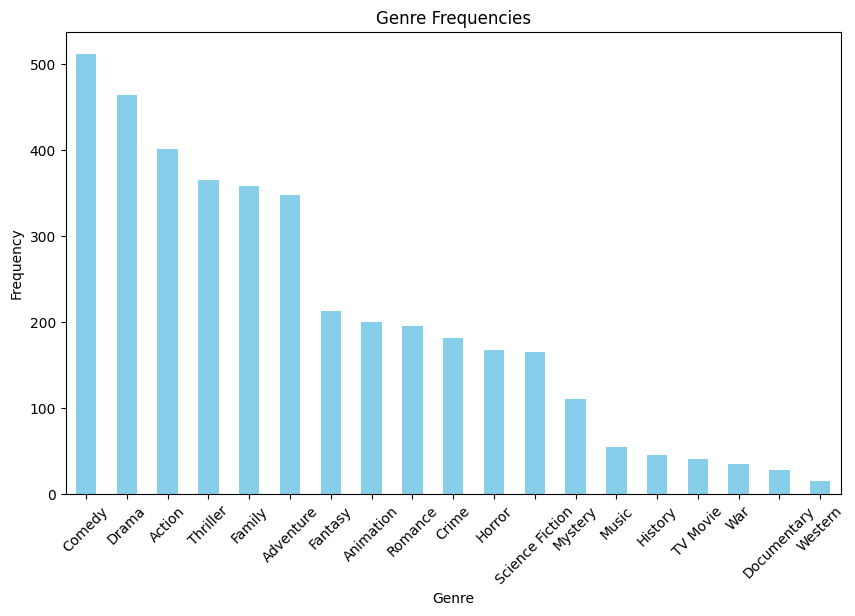

In [57]:
mlb = MultiLabelBinarizer()
genres_transformed = mlb.fit_transform(has_duration_movies['genre'])

# Convert to DataFrame for easier plotting
genres_df = pd.DataFrame(genres_transformed, columns=mlb.classes_)

# Sum up occurrences of each genre
genre_counts = genres_df.sum().sort_values(ascending=False)

# Plot histogram
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Frequencies')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [58]:
X = has_duration_movies[["genre","duration"]]
y = has_duration_movies["score"]

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)



In [59]:
class MultiLabelBinarizerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mlb = MultiLabelBinarizer()

    def fit(self, X, y=None):
        self.mlb.fit(X)
        return self

    def transform(self, X):
        return self.mlb.transform(X)

In [60]:
scaler = StandardScaler()
minmax = MinMaxScaler()
mlb = MultiLabelBinarizer()

preprocessor = ColumnTransformer(transformers=[
    ("genres",MultiLabelBinarizerTransformer(),"genre"),
    ("duration",scaler,["duration"])
])

##### KNN Model

In [61]:
#Method 1 : KNN Model

tree = DecisionTreeRegressor()

pipeline = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",tree)
])

pipeline.fit(X_train,y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('genres',
                                                  MultiLabelBinarizerTransformer(),
                                                  'genre'),
                                                 ('duration', StandardScaler(),
                                                  ['duration'])])),
                ('model', DecisionTreeRegressor())])

In [62]:
prediction = pipeline.predict(X_test)

print("Mean Absolute Error: ",mean_absolute_error(y_test,prediction))
print("Root Mean Squared Error : ",root_mean_squared_error(y_test,prediction))
print("Mean Squared Error: ",np.power(root_mean_squared_error(y_test,prediction),2))
print("R2_score : ",r2_score(y_test,prediction))

Mean Absolute Error:  7.377083333333334
Root Mean Squared Error :  9.33013205090376
Mean Squared Error:  87.05136408730161
R2_score :  -0.4953818249082469


C:\Users\viola\AppData\Local\Temp\ipykernel_8056\817637688.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Labels')


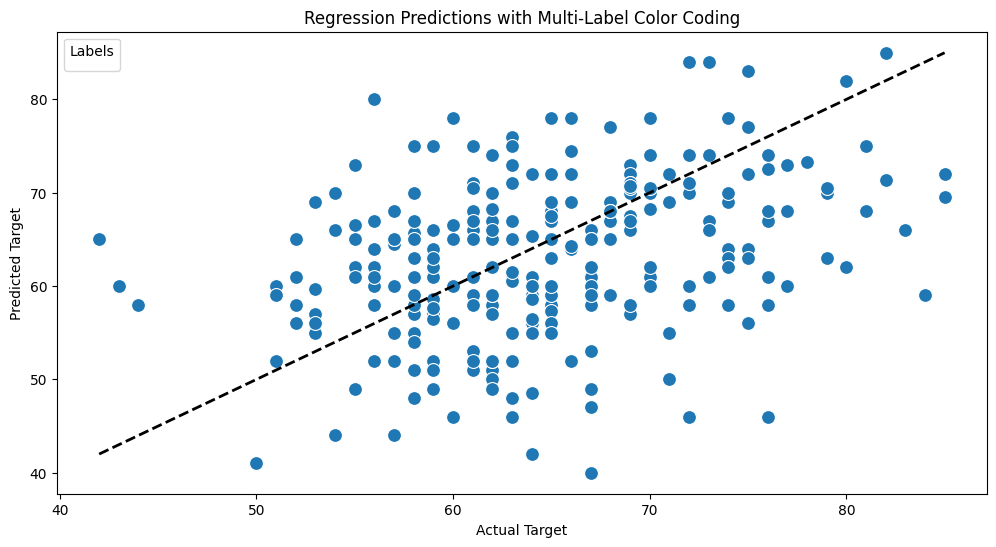

In [63]:
# Box plot of actual vs predicted values grouped by multi-label combinations
X_test_copy = X_test.copy()

X_test_copy['y_pred'] = prediction
X_test_copy['y_test'] = y_test

plt.figure(figsize=(12, 6))
sns.scatterplot(data=X_test_copy, x='y_test', y='y_pred',  s=100)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for perfect prediction
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Regression Predictions with Multi-Label Color Coding')
plt.legend(title='Labels')
plt.show()

##### KNN Hyperparamter Tuning

In [64]:
knn = DecisionTreeRegressor()

knn.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [65]:
from sklearn.model_selection import GridSearchCV

parameters={"model__max_depth" : [1,3,5,7,9],
            "model__max_features":range(1,5,2),
            "model__max_leaf_nodes":[None,10,20,30,40,50,60,70],
           "model__min_samples_leaf":[1,2,3,4,5,6,7,8],
           "model__min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
           "model__splitter":["best","random"],}

knn_pipeline = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",(knn))
])

knn_clf = GridSearchCV(estimator=knn_pipeline, param_grid = parameters, cv = 3, verbose=3, scoring="neg_mean_squared_error")
knn_clf.fit(X_train,y_train)

Fitting 3 folds for each of 6400 candidates, totalling 19200 fits
[CV 1/3] END model__max_depth=1, model__max_features=1, model__max_leaf_nodes=None, model__min_samples_leaf=1, model__min_weight_fraction_leaf=0.1, model__splitter=best;, score=-65.607 total time=   0.0s
[CV 2/3] END model__max_depth=1, model__max_features=1, model__max_leaf_nodes=None, model__min_samples_leaf=1, model__min_weight_fraction_leaf=0.1, model__splitter=best;, score=-59.701 total time=   0.0s
[CV 3/3] END model__max_depth=1, model__max_features=1, model__max_leaf_nodes=None, model__min_samples_leaf=1, model__min_weight_fraction_leaf=0.1, model__splitter=best;, score=-62.844 total time=   0.0s
[CV 1/3] END model__max_depth=1, model__max_features=1, model__max_leaf_nodes=None, model__min_samples_leaf=1, model__min_weight_fraction_leaf=0.1, model__splitter=random;, score=-64.919 total time=   0.0s
[CV 2/3] END model__max_depth=1, model__max_features=1, model__max_leaf_nodes=None, model__min_samples_leaf=1, model

c:\Users\viola\anaconda3\envs\opencv-env\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('genres',
                                                                         MultiLabelBinarizerTransformer(),
                                                                         'genre'),
                                                                        ('duration',
                                                                         StandardScaler(),
                                                                         ['duration'])])),
                                       ('model', DecisionTreeRegressor())]),
             param_grid={'model__max_depth': [1, 3, 5, 7, 9],
                         'model__max_features': range(1, 5, 2),
                         'model__max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60,
                                                   70],
                         'model__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'model__min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4,
                                                             0.5],
                         'model__splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [66]:
print("Best Parameter:\n",knn_clf.best_params_)
print("Best Score:\n",knn_clf.best_score_)

Best Parameter:
 {'model__max_depth': 7, 'model__max_features': 3, 'model__max_leaf_nodes': 20, 'model__min_samples_leaf': 5, 'model__min_weight_fraction_leaf': 0.1, 'model__splitter': 'best'}
Best Score:
 -54.081526191268324


In [67]:
best_knn = DecisionTreeRegressor(max_depth=7,max_features=3,max_leaf_nodes=30,
                                 min_samples_leaf=7,min_weight_fraction_leaf=0.1,splitter="best")

grid_knn_pipeline = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",best_knn)
])

grid_knn_pipeline.fit(X_train,y_train)

knn_clf_prediction = grid_knn_pipeline.predict(X_test)
print("Mean Absolute Error : ", mean_absolute_error(y_test,knn_clf_prediction))
print("Root Mean Squared Error", root_mean_squared_error(y_test,knn_clf_prediction))
print("Mean Squared Error", np.power(root_mean_squared_error(y_test,knn_clf_prediction),2))
print("R2 Score : ", r2_score(y_test,knn_clf_prediction))

Mean Absolute Error :  5.440122487802349
Root Mean Squared Error 6.924154308903426
Mean Squared Error 47.94391289350588
R2 Score :  0.17641203319878695


In [68]:
test_features = {
    "genre" : ["Action","Drama"],
    "duration" : 120
}

input_data = pd.DataFrame([test_features])
print(input_data)

test_prediction = grid_knn_pipeline.predict(input_data)
print("Prediction Result : ",test_prediction)

             genre  duration
0  [Action, Drama]       120
Prediction Result :  [69.67272727]


##### SVM Model

In [79]:
#Method 1 : SVM Model

from sklearn.svm import SVR

svr = SVR(kernel='rbf')

pipeline = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",svr)
])

pipeline.fit(X_train,y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('genres',
                                                  MultiLabelBinarizerTransformer(),
                                                  'genre'),
                                                 ('duration', StandardScaler(),
                                                  ['duration'])])),
                ('model', SVR())])

In [80]:
prediction = pipeline.predict(X_test)

print("Mean Absolute Error: ",mean_absolute_error(y_test,prediction))
print("Root Mean Squared Error : ",root_mean_squared_error(y_test,prediction))
print("Mean Squared Error: ",np.power(root_mean_squared_error(y_test,prediction),2))
print("R2_score : ",r2_score(y_test,prediction))


Mean Absolute Error:  4.903583034365241
Root Mean Squared Error :  6.24494766373177
Mean Squared Error:  38.99937132274889
R2_score :  0.3300627546697602


##### Hyperparamter Tuning

In [71]:
svr = SVR()

svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = {
        'model__C': [0.1, 1, 10, 100],
        'model__epsilon': [0.1, 0.2, 0.5, 1.0],
        'model__gamma': ['scale', 'auto', 0.1, 1, 10],
        'model__kernel': ['linear', 'rbf', 'sigmoid'],
    }

svr_pipeline = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",svr)
])

svr_clf = GridSearchCV(estimator=svr_pipeline, param_grid = param_grid, cv = 5, verbose=2, scoring="neg_mean_squared_error")
svr_clf.fit(X_train,y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END model__C=0.1, model__epsilon=0.1, model__gamma=scale, model__kernel=linear; total time=   0.0s
[CV] END model__C=0.1, model__epsilon=0.1, model__gamma=scale, model__kernel=linear; total time=   0.0s
[CV] END model__C=0.1, model__epsilon=0.1, model__gamma=scale, model__kernel=linear; total time=   0.0s
[CV] END model__C=0.1, model__epsilon=0.1, model__gamma=scale, model__kernel=linear; total time=   0.0s
[CV] END model__C=0.1, model__epsilon=0.1, model__gamma=scale, model__kernel=linear; total time=   0.0s
[CV] END model__C=0.1, model__epsilon=0.1, model__gamma=scale, model__kernel=rbf; total time=   0.0s
[CV] END model__C=0.1, model__epsilon=0.1, model__gamma=scale, model__kernel=rbf; total time=   0.0s
[CV] END model__C=0.1, model__epsilon=0.1, model__gamma=scale, model__kernel=rbf; total time=   0.0s
[CV] END model__C=0.1, model__epsilon=0.1, model__gamma=scale, model__kernel=rbf; total time=   0.0s
[CV] END mod

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('genres',
                                                                         MultiLabelBinarizerTransformer(),
                                                                         'genre'),
                                                                        ('duration',
                                                                         StandardScaler(),
                                                                         ['duration'])])),
                                       ('model', SVR())]),
             param_grid={'model__C': [0.1, 1, 10, 100],
                         'model__epsilon': [0.1, 0.2, 0.5, 1.0],
                         'model__gamma': ['scale', 'auto', 0.1, 1, 10],
                         'model__kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error', verbose=2)

In [83]:
print("Best Parameter:\n",svr_clf.best_params_)
print("Best Score:\n",svr_clf.best_score_)

Best Parameter:
 {'model__C': 10, 'model__epsilon': 0.5, 'model__gamma': 0.1, 'model__kernel': 'rbf'}
Best Score:
 -42.04975909353171


In [86]:
best_svr = SVR(kernel="rbf",C=10,epsilon=0.5,gamma=0.1)

grid_svr_pipeline = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",best_svr)
])

grid_svr_pipeline.fit(X_train,y_train)

grid_svr_prediction = grid_svr_pipeline.predict(X_test)
print("Mean Absolute Error : ", mean_absolute_error(y_test,grid_svr_prediction))
print("Root Mean Squared Error", root_mean_squared_error(y_test,grid_svr_prediction))
print("Mean Squared Error", np.power(root_mean_squared_error(y_test,grid_svr_prediction),2))
print("R2 Score : ", r2_score(y_test,grid_svr_prediction))

Mean Absolute Error :  4.776165933122121
Root Mean Squared Error 6.0700697018747425
Mean Squared Error 36.84574618561773
R2 Score :  0.36705806107876415


In [87]:
test_features = {
    "genre" : ["Action","Drama"],
    "duration" : 120
}

input_data = pd.DataFrame([test_features])
print(input_data)

test_prediction = grid_svr_pipeline.predict(input_data)
print("Prediction Result : ",test_prediction)

             genre  duration
0  [Action, Drama]       120
Prediction Result :  [67.36301302]


## Testing Prediction

In [81]:
has_duration_movies.to_csv("final_dataset.csv")

In [82]:
unique_values_list = has_duration_movies["genre"].explode().unique().tolist()

unique_values_list


['Comedy',
 'Romance',
 'Drama',
 'Adventure',
 'Action',
 'Fantasy',
 'Family',
 'Thriller',
 'Crime',
 'History',
 'Horror',
 'Science Fiction',
 'TV Movie',
 'Animation',
 'War',
 'Music',
 'Mystery',
 'Documentary',
 'Western']

## Test

In [72]:
ratings = pd.read_csv('ratings.csv')
user_movie_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating')
user_movie_matrix.fillna(0, inplace=True)
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(user_movie_matrix)

def get_movie_recommendations(user_id, n_recommendations=5):
    user_vector = user_movie_matrix.loc[user_id].values.reshape(1, -1)
    distances, indices = model_knn.kneighbors(user_vector, n_neighbors=n_recommendations + 1)
    similar_users = indices.flatten()[1:]
    recommended_movies = []

    for user in similar_users:
        user_ratings = user_movie_matrix.iloc[user]
        top_movies = user_ratings[user_ratings > 4].index.tolist()
        recommended_movies.extend(top_movies)
    recommended_movies = list(set(recommended_movies))
    return recommended_movies[:n_recommendations]

user_id = 1
recommended_movies = get_movie_recommendations(user_id, n_recommendations=5)
print(f"Rekomendasi film untuk user {user_id}: {recommended_movies}")

FileNotFoundError: [Errno 2] No such file or directory: 'ratings.csv'